# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
## Not for grading

## Dataset 

#### Description
The Iris dataset consists of 150 data instances. There are 3 classes (Iris Versicolor, Iris Setosa and Iris Virginica) each have 50 instances. 


For each flower we have the below data attributes 

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

To make our experiment easy we rename the classes  with numbers : 

    "0": setosa
    "1": versicolor
    "2": virginica

### Setup Steps

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "Demo_Bagging_using_Iris" #name of the notebook
Answer = "Ungraded"
def setup():
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Iris.csv")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


#### Import required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import os
from sklearn.utils import resample
import random
from sklearn import metrics

#### Loading the data

In [ ]:
# Loading the iris dataset
iris = pd.read_csv("Iris.csv")
iris = iris.drop('Id',axis=1)
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Species from Iris dataset
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# Converting the labels to numericals
converter = {"Iris-setosa":0, "Iris-versicolor": 1,"Iris-virginica":2}
iris['species'] = [converter [i] for i in iris['species']]

In [ ]:
# Split the data into train and test data
train_data, test_data = train_test_split(iris.values.tolist(), test_size=0.2)
len(train_data), len(test_data)

(120, 30)

### Sampling with replacement

In [ ]:
# Function to create 5 subsets with replacement

def select_samples(nTimes, howmany, data):
  subsets = []
  for i in range(nTimes):
    subset_i = resample(train_data, n_samples=howmany, replace=True)
    subsets.append(subset_i)
    
    print("subset_%d has %d samples in which %d are unique samples and %d are repeated samples" %(i,len(subset_i), len(np.unique(subset_i, axis=0)), (len(subset_i)-len(np.unique(subset_i, axis=0)))))
  return subsets

In [ ]:
# Calling the above function to create 5 subsets for train data, each of size 120
subsets = select_samples(5, 120, train_data) 

subset_0 has 120 samples in which 76 are unique samples and 44 are repeated samples
subset_1 has 120 samples in which 72 are unique samples and 48 are repeated samples
subset_2 has 120 samples in which 78 are unique samples and 42 are repeated samples
subset_3 has 120 samples in which 78 are unique samples and 42 are repeated samples
subset_4 has 120 samples in which 70 are unique samples and 50 are repeated samples


In [ ]:
# Initialize the Decision tree
decision_tree = DecisionTreeClassifier(max_depth=2)

In [ ]:
# Classify each subset using Decision tree
def DT_subset(train_data, model):
  features = np.array(train_data)[:,:-1]
  labels = np.array(train_data)[:,-1]
  
  X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score = metrics.accuracy_score(y_pred, y_test)
  
  return model, score

In [ ]:
# Print the score of first subset
model, score = DT_subset(subsets[0], decision_tree)
print(score)

0.9166666666666666


Accuracy for this subset 0.92


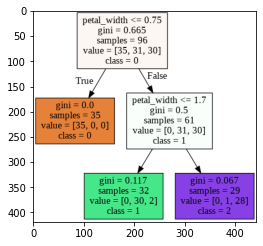

Accuracy for this subset 1.0


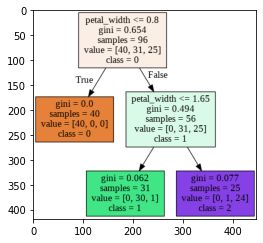

Accuracy for this subset 0.88


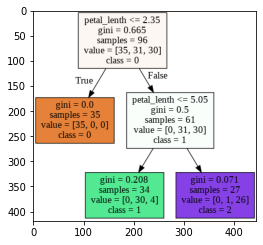

Accuracy for this subset 0.96


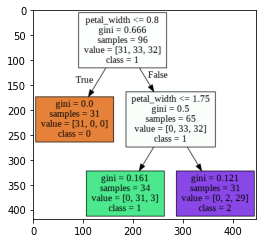

Accuracy for this subset 0.92


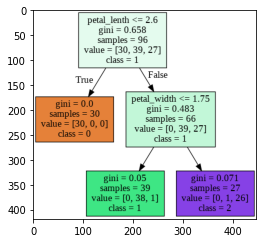

In [ ]:
# Plot the graphviz for each subset
for each in subsets:
    model, score = DT_subset(each, decision_tree)
    print ("Accuracy for this subset", round(score,2))
    
    saveAs = "iris_dt"
    save_dot = saveAs + ".dot"
    save_png = saveAs + ".png"
    
    # Exporting the model into a dot file
    graph = graphviz.Source(export_graphviz(model, out_file=save_dot
        , feature_names=['sepal_length', 'sepal_width', 'petal_lenth', 'petal_width'], class_names=['0', '1', '2'] 
        , filled = True))
    os.system("dot -T png -o " + save_png + " " + save_dot)
    plt.figure(figsize=(4,4))
    plt.imshow(plt.imread("iris_dt.png"))
    plt.show()
   

Accuracy for this subset 0.958


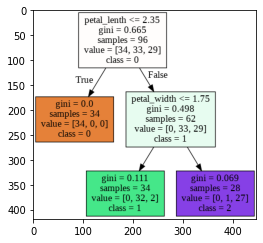

Accuracy for this subset 1.0


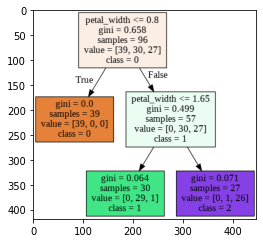

Accuracy for this subset 0.958


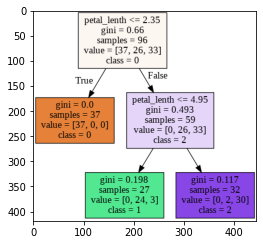

Accuracy for this subset 1.0


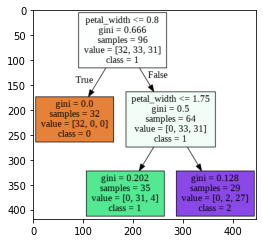

Accuracy for this subset 0.958


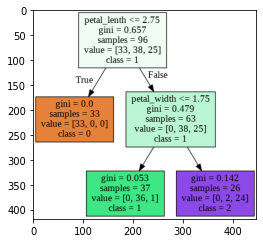

In [ ]:
# Plot the graphviz for each subset
for each in subsets:
    model, score = DT_subset(each, decision_tree)
    print ("Accuracy for this subset", round(score,3))
    
    saveAs = "iris_dt"
    save_dot = saveAs + ".dot"
    save_png = saveAs + ".png"
    
    # Exporting the model into a dot file
    graph = graphviz.Source(export_graphviz(model, out_file=save_dot
        , feature_names=['sepal_length', 'sepal_width', 'petal_lenth', 'petal_width'], class_names=['0', '1', '2'] 
        , filled = True))
    os.system("dot -T png -o " + save_png + " " + save_dot)
    plt.figure(figsize=(4,4))
    plt.imshow(plt.imread("iris_dt.png"))
    plt.show()
 

Each subset produce slightly different decision tree but it is around same ballpark accuracy

## Please answer the questions below to complete the experiment:

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NaN" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 5306
Date of submission:  26 Sep 2020
Time of submission:  10:23:57
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
